In [6]:
#import stuff
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import requests
import zipfile
import io
import folium 
from datetime import date
import sklearn
from sklearn.preprocessing import PolynomialFeatures
#abcd


In [7]:
# IMPORT DATA: DECLARE FILE PATH AND READ CSVs in FILEPATH#

#Declare Filepath for hour dataset from where to load data
file_path_hour = r'C:\Users\rsend\Documents\2.) Coding\Projects(repository)\clipboard_folder\EDA_hour.xlsx'

#
file_path_full = r'C:\Users\rsend\Documents\2.) Coding\Projects(repository)\clipboard_folder\EDA_hour_full.xlsx'

# Use pd.read_csv() to read the CSV file
data_hour = pd.read_excel(file_path_hour)
d_hour_fblown = pd.read_excel(file_path_full)

# data_day = pd.read_csv(file_path_day)

# Just generell info regarding datasets
# data_hour.tail(5)
#17378 data entries 27 columns
# data_day.tail(5)
#730 day entries (2 years) with 26 columns

<Axes: >

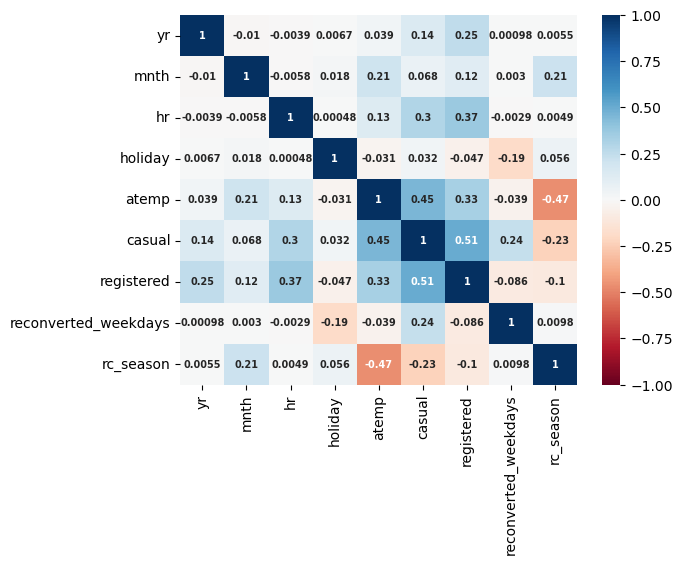

In [8]:
# 12: I am getting an error message because the DF data_hour contains also non-int and non-float features. I need to exclude or convert them.I should exclude any column not needed for my model either way.
# That is why a headmap is useful:
# EDA: 9.) Perform multivariant analysis (density, scatterplots, correlation matrix, heatmap): CREATE HEATMAP
d_hour = data_hour.copy()
d_hour_casual_time = d_hour.copy()
d_hour_drop_time_casual = ['Count']
d_hour_casual_time.drop(d_hour_drop_time_casual,axis=1,inplace=True)
d_hour_casual_time.tail(5)

corr_d_hour_casual_time = d_hour_casual_time.corr()
sns.heatmap(corr_d_hour_casual_time,cmap='RdBu',vmin=-1,vmax=1,annot=True,annot_kws={'fontsize':7,'fontweight':'bold'})

In [9]:
# # Map out the differences: # UNFORTUNATELY THIS DOES NOT TELL ME MUCH
# residuals_cb_1 = y_test_cb_1 - y_pred_cb_1
# # plt.scatter(y_test_cb_1,residuals_cb_1,s=10)
# # plt.xlabel("Residuals")
# # plt.ylabel("Actual Values ('Count')")
# # plt.title("Residual Plot")
# # plt.axhline(y=0, color='r',linestyle='--')
# plt.show()

# plt.scatter(y_pred_cb_1,residuals_cb_1,s=10)
# plt.xlabel("Residuals")
# plt.ylabel("predicted values ('Count')")
# plt.title("Residual Plot")
# plt.axhline(y=0, color='r',linestyle='--')
# plt.show()

# plt.scatter(y_test_cb_1,y_pred_cb_1,s=10)
# plt.xlabel("Predicted Values")
# plt.ylabel("Test values)")
# plt.title("Residual Plot")
# plt.axhline(y=0, color='r',linestyle='--')
# plt.show()

MachineLearning Function (DEF)

Dataframe source: d_hour_basic
ML Model used: SupportVectorRegression
Target variable predicted:casual
Features dropped: ['registered', 'Count']
Features encoded: ['atemp', 'yr', 'rc_season', 'hr', 'holiday', 'reconverted_weekdays']
Encoder used: Ordinal Encoder(only coded to work)
Polynomial Features included?:False
Polynomial Degrees used: 0
MSE: 1729.1
MAE: 23.3
R2 : 0.248


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Cross Validation Scores: 0.106


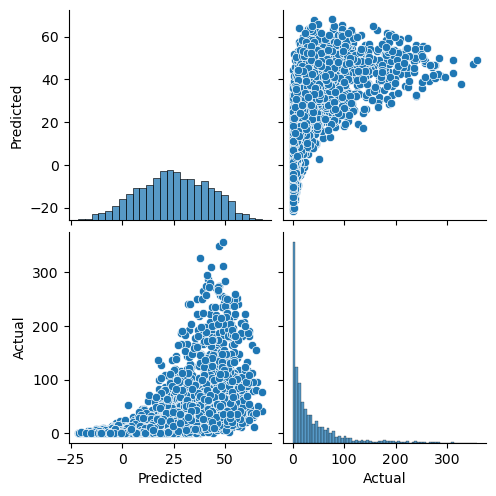

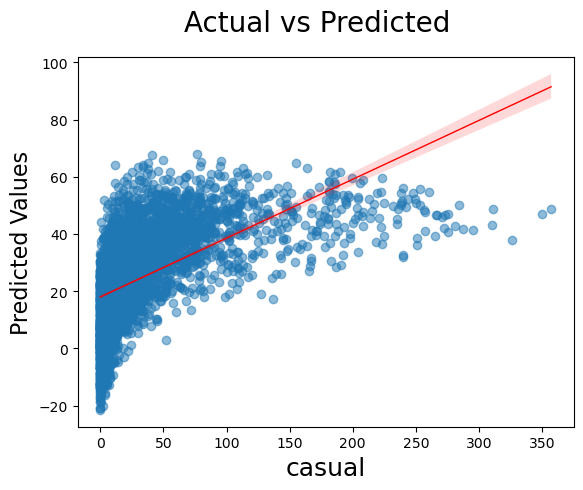

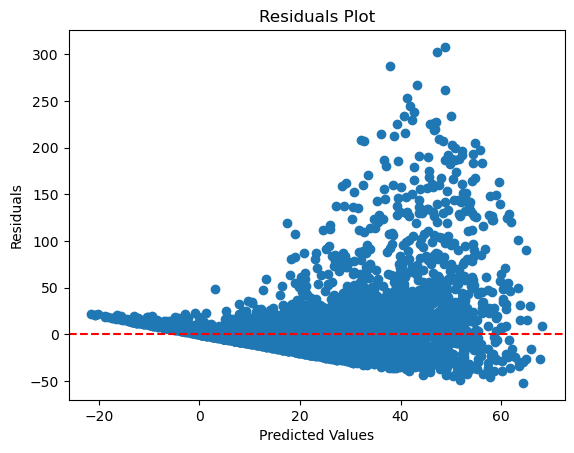

(23.291034820887557, 1729.0708660630512)

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# The idea here is that you can run this function in order to set up the prediction of the bike usage with different models(and their respective parameters),
# various types of encoding, with/without polynomial features. Basically a blueprint

# 13 DEF FUNCTION BUILDING: Create a copy, call it d_hour_basic
d_hour_basic = d_hour.copy()
d_hour_basic.name = 'd_hour_basic'  # Set the dataframe name

def ml_run_flexible(input_dataframe,input_fts_to_drop,input_target_xy,input_fts_to_encode,input_ml_model_type, include_polynomial_features=False, degree=(2),optional_model_input=False):
    
    #1 input: select dataframe
    df = input_dataframe.copy()

    #2 input which features(columns) to drop
    df.drop(input_fts_to_drop,axis=1,inplace=True)

    #3 Choose type of encoder
    choosen_encoder = str(input('Choose an Encoder: Default = OrdinalEncoder') or 'OrdinalEncoder')         # the only one that makes sense with our type of data

    #3 encode categorical features -- currently only Ordinal Encoder used. 
    if choosen_encoder == 'Ordinal Encoder':
        for feature in input_fts_to_encode:
            encoder = OrdinalEncoder()
            encoded_feature = encoder.fit_transform(df[[feature]])
            df_feature = encoded_feature

    # Split the data into features (X) and target (Y)
    X = df.drop(columns=[input_target_xy], axis=1)
    Y = df[input_target_xy]

    # Split your data into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

    # Data normalization using MinMaxScaler                                                                 # later iteration should include various Scalers 
    scaler = MinMaxScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)

    # Create polynomial features
    if include_polynomial_features and degree > 1:
        poly = PolynomialFeatures(degree)
        X_train_norm = poly.fit_transform(X_train_norm)
        X_test_norm = poly.transform(X_test_norm)
        

    # Set up the machine learning model                                                            (you select the model in the function input parameters)                  
    if input_ml_model_type == 'LinearRegression':                                                   #1 LinearRegression (non-sensical datawise but just to have it covered)
        model = LinearRegression()

    if input_ml_model_type == 'RandomForestRegressor':                                              #2 RandomForestRegression
        # Prompt the user for custom RandomForestRegressor parameters
        n_estimators = int(input('Enter n_estimators default=1000') or 1000)
        min_samples_split = int(input('Enter min_samples_split default=2') or 2)
        min_samples_leaf = int(input('Enter min_samples_leaf default=1') or 1)
        max_features = (input('Enter max_features default=sqrt') or 'sqrt')
        max_depth = int(input('Enter max_depth default=110') or 110)
        random_state = int(input('Enter random_state default=42') or 42)

        from sklearn.ensemble import RandomForestRegressor
        model = RandomForestRegressor(
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_depth=max_depth,
        random_state=random_state)
    
    if input_ml_model_type == 'SupportVectorRegression':                                              #3 SupportVectorMachines: works but SVR-specific parameters are still missing in the function setup
        # from sklearn.svm import SVR
        from sklearn.svm import LinearSVR
        model = LinearSVR(epsilon=0.0, tol=1e-5)
        # input_kernel = (input('Confirm or choose kernel: default =rbf') or 'rbf')
        # model = svm.SVC(kernel=input_kernel) # not finished
        # clf = svm.SVC(kernel='rbf').fit(X_train_norm_svm ,y_train_svm)

    if input_ml_model_type == 'DecisionTreeRegressor':                                              #4 DecisionTreeRegressor
        from sklearn import tree
        model = tree.DecisionTreeRegressor()
    
    # Fit the selected model
    model.fit(X_train_norm, y_train)

    #in case of Linear Regression: Calculate Intercept & Coefficients
    if input_ml_model_type == 'LinearRegression':
        intercept = model.intercept_
        coefficients = model.coef_

    # Make predictions on the test set
    y_pred = model.predict(X_test_norm)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    formatted_mse = f''

    df.name = 'd_hour_basic'
    
    #Printout result/run-specific information for evaluation of results
    print(f'Dataframe source: {input_dataframe.name}')                              # print name of input dataframe
    print(f'ML Model used: {input_ml_model_type}')                                  # print name of ML Model used
    print(f'Target variable predicted:{input_target_xy}')                           # print name of target variable (predicted variable(x))
    print(f'Features dropped: {input_fts_to_drop}')                                 # print name of dropped features
    print(f'Features encoded: {input_fts_to_encode}')                               # print which features were encoded
    print(f'Encoder used: Ordinal Encoder(only coded to work)')                     # print which encoder was used for encoding
    print(f'Polynomial Features included?:{include_polynomial_features}')           # print if polynomial features were used
    print(f'Polynomial Degrees used: {degree}')                                     # if polynomial features used: how many degrees were used?
    print(f'MSE: {mse:.1f}')                                                        # print evaluation matrix mean squared error
    print(f'MAE: {mae:.1f}')                                                        # print evaluation matrix mean absolute error
    print(f'R2 : {r2:.3f}')                                                         # print evaluation matrix R2 score

    #Select if coefficient and intercept will be printed out: enter/default == false
    if input_ml_model_type == 'LinearRegression':
        print_intercept_coeff_yes_no = input(str('Do you want the intercept and coefficients printed out? default = False'))
        if print_intercept_coeff_yes_no.lower() == 'true':
            print(f'Intercept: {intercept}')
            print(f'Coefficients: {coefficients}')
    
    # Validate your ML model using Cross validation
    scores = cross_val_score(model, X, Y, cv=10, scoring = 'r2').mean()
    model.score(X_test_norm, y_test)
    print(f'Cross Validation Scores: {scores:.3f}')

    # Print model importances:

    if input_ml_model_type == 'RandomForestRegressor':
        importances = model.feature_importances_
        print(importances)
    predictions_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
    sns.pairplot(data=predictions_df)
    plt.show()

    fig = plt.figure()
    plt.scatter(y_test, y_pred, alpha=.5)
    fig.suptitle('Actual vs Predicted', fontsize = 20)
    plt.xlabel('Actual Values', fontsize = 18)
    plt.ylabel('Predicted Values', fontsize = 16)



    # Adding a regression line
    sns.regplot(x=y_test, y=y_pred, scatter=False, color='red',line_kws={'linewidth': 1})
    plt.show()

    # Calculate residuals
    residuals = y_test - y_pred
    # print(len(residuals))
    # print(len(X_test))
    # print(X_test.dtypes)
    # print(residuals.dtypes)
    # print(X_test.shape())
    # print(residuals.shape())
    
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals Plot")
    plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
    plt.show()


    return mae, mse


# (input_dataframe,input_fts_to_drop,input_target_xy,input_fts_to_encode,input_ml_model_type, include_polynomial_features=False, degree=(2)):
ml_run_flexible(d_hour_basic,['registered','Count'],'casual',['atemp','yr','rc_season','hr','holiday','reconverted_weekdays'],'SupportVectorRegression',False,degree=(0))

In [ ]:
# To dos (30/11/23)
# - include Recursive Feature elimmination template
# - randomized search CV works but the results are not really better than the current model prediction (e.g. DecisionTreeRegressor)

In [ ]:
# RandomizedSearchCV - results not better than that of current configuration

# from pprint import pprint
# from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
## Fit the random search model
# rf_random.fit(X, Y)

In [ ]:
# MAP OUT DIFFERENCES: Quantile-Approach
# Quantile-Quantile (Q-Q) Plot:     A Q-Q plot compares the quantiles of the residuals to the quantiles of a theoretical normal distribution. 
# If the points on the Q-Q plot follow a straight line, it suggests that the residuals are normally distributed. Deviations from a straight line can indicate departures from normality.

#declare residuals
residuals_cb_1 = y_test_cb_1 - y_pred_cb_1

from statsmodels.graphics.gofplots import qqplot
qqplot(residuals_cb_1, line='s')
plt.title("Q-Q Plot")
plt.show()

#Histogram
plt.hist(residuals_cb_1, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

#Appears that the way that my data is distributed is highly skewed / non-normal. 